In [1]:
import pandas as pd

In [63]:
import seaborn as sns 
import numpy as np

In [40]:
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
df = pd.read_csv('lesson_3_data_1_.csv', encoding='windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
df.shape

(48129, 21)

In [5]:
user_df = df[['tc', 'art_sp']]

In [6]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [7]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [8]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [9]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [10]:
brand_name.split(' ')[-1]

'Store_Brand'

In [11]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [12]:
split_brand('MARAVILLA 500 G Store_Brand')

'Store_Brand'

In [13]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [13]:
# user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# используем lambda функцию, чтобы разрезать строку по пробелу и взять последний элемент

In [ ]:
# df is a dataframe as usual
# df = df.rename(columns=lambda c: c.upper().replace('-', '_'))
# переименование колонок в датафрэйме. Здесь мы делаем их заглавными и заменяем дефисы на нижние подчёркивания

In [14]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [60]:
user_df.brand_name.unique()

array(['Store_Brand', 'Brand_1', 'Brand_7', 'Brand_2', 'Brand_3',
       'Brand_4', 'Brand_5', 'Brand_6'], dtype=object)

In [61]:
user_df.brand_name.nunique()

8

In [16]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 5')

In [17]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [21]:
users_purchases.purchases.describe()

count    3383.000000
mean        9.320130
std         5.623993
min         5.000000
25%         6.000000
50%         7.000000
75%        11.000000
max        60.000000
Name: purchases, dtype: float64

In [23]:
user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .query('user_id == 1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


In [24]:
user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False])

,user_id,brand_name,brand_info
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
3,4241,Brand_4,3
4,4241,Store_Brand,2
2,1031,Store_Brand,5
1,1031,Brand_3,1


In [25]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})

In [30]:
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [28]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [31]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [32]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [33]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [34]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [35]:
loyal_users

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [36]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [37]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


In [59]:
loyalty_df.lovely_brand.value_counts()

Brand_4        2041
Store_Brand     715
Brand_1         410
Brand_3         115
Brand_2          88
Brand_7           9
Brand_5           5
Name: lovely_brand, dtype: int64

In [38]:
loyalty_df.loyalty_score.describe()

count    3383.000000
mean        0.759356
std         0.198331
min         0.200000
25%         0.600000
50%         0.800000
75%         1.000000
max         1.000000
Name: loyalty_score, dtype: float64

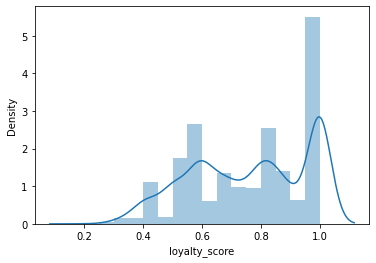

In [46]:
ax = sns.distplot(loyalty_df.loyalty_score)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


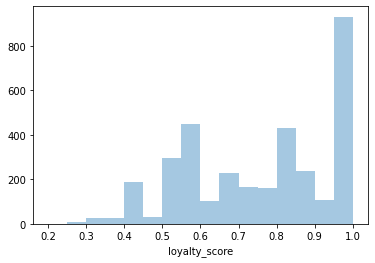

In [49]:
ax = sns.distplot(loyalty_df.loyalty_score, kde=False)

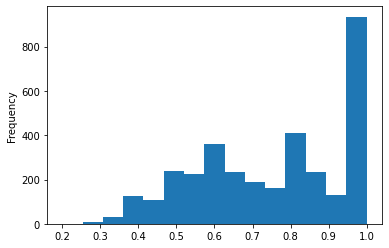

In [92]:
loyalty_df.loyalty_score.plot.hist(bins=15)
# bins здесь — число диапазонов (корзин/бакетов), на которые мы разделяем значения.

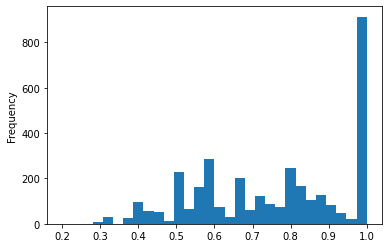

In [93]:
loyalty_df.loyalty_score.plot.hist(bins=30)

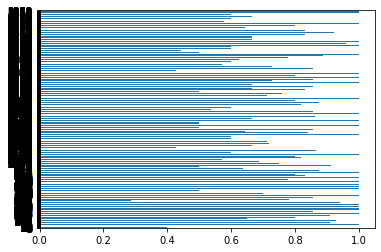

In [96]:
loyalty_df.loyalty_score.plot.barh()

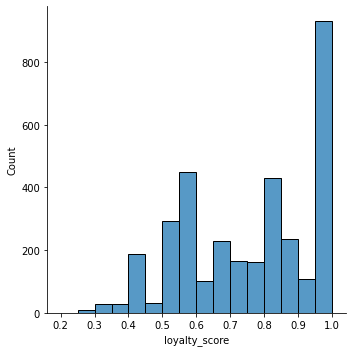

In [48]:
ax = sns.displot(loyalty_df.loyalty_score)

In [50]:
loyalty_df.loyalty_score.median()

0.8

In [56]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}) 

In [52]:
brands_loyalty

,lovely_brand,loyalty_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5
5,Brand_7,0.444444,9
6,Store_Brand,0.750000,715


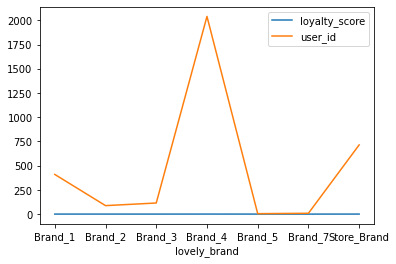

In [54]:
brands_loyalty = loyalty_df.groupby('lovely_brand') \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}).plot() 

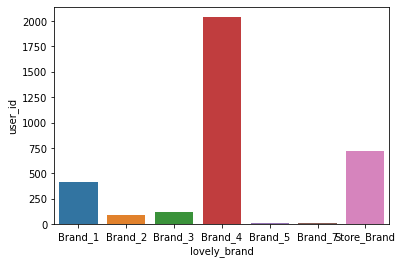

In [57]:
ax = sns.barplot(x="lovely_brand", y="user_id", data=brands_loyalty)

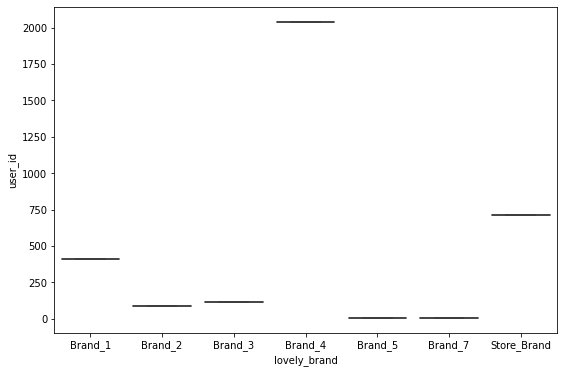

In [100]:
plt.figure(figsize=(9,6)) #масштаб графика (ширина, высота)
bx = sns.boxplot(data=brands_loyalty, x="lovely_brand", y="user_id")
plt.savefig('1.jpg')

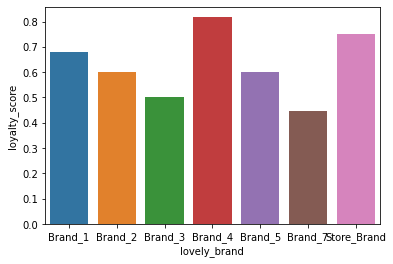

In [58]:
ax = sns.barplot(x="lovely_brand", y="loyalty_score", data=brands_loyalty)

In [ ]:
# df.reset_index - Индексом становится дефолтная последовательность чисел от 0 до числа строк 
# (перевести индекс датафрэйма в колонку)

In [81]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [82]:
df.reset_index()

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [ ]:
# df.reset_index(drop=True) - нужно ли переводить индекс в колонку, или убрать его из таблицы

In [83]:
df.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


In [84]:
df.reset_index(drop=False)

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [85]:
# df.isna().sum() - кол-во NA в разных колонках датафрейма

df.isna().sum()

class        0
max_speed    1
dtype: int64

In [86]:
txt = "apple#banana#cherry#orange"

# setting the maxsplit parameter to 1, will return a list with 2 elements!
x = txt.split("#", 1)

print(x)

['apple', 'banana#cherry#orange']


In [87]:
df.index


Index(['falcon', 'parrot', 'lion', 'monkey'], dtype='object')

In [88]:
df.columns


Index(['class', 'max_speed'], dtype='object')